<a href="https://colab.research.google.com/github/Jeet1309/AI-ML-tss/blob/main/Ae244.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AE 244 ASSIGNMENT**

# **IMPORTED FUNCTION**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
from scipy.integrate import simps

dx = 0.02
n = 50


# **USER DEFINED FUNCTION**

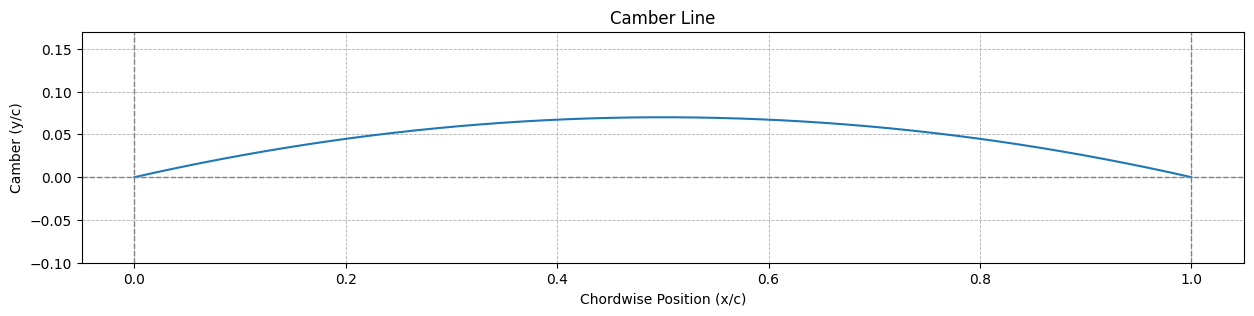

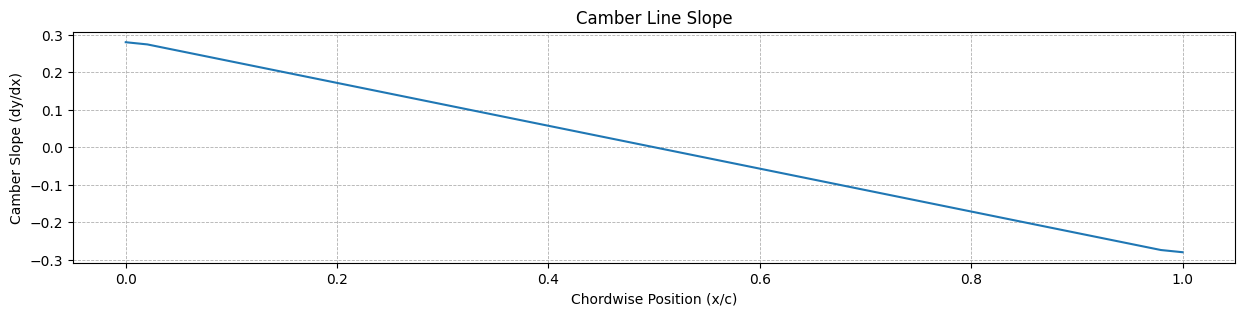

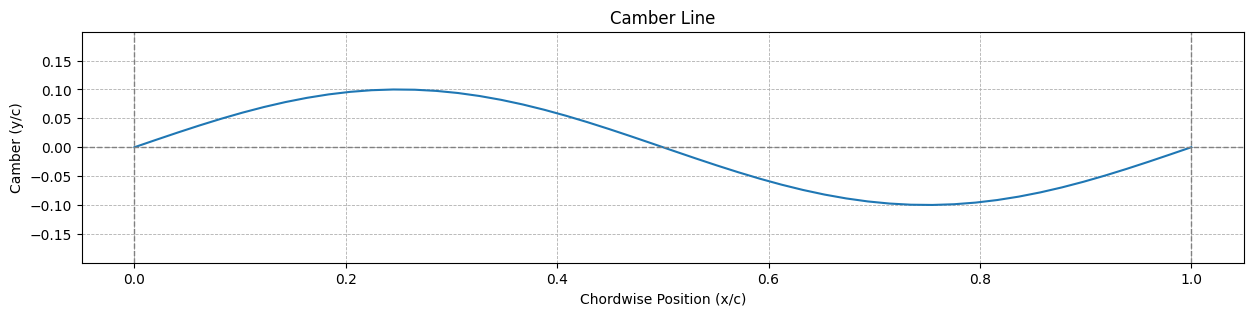

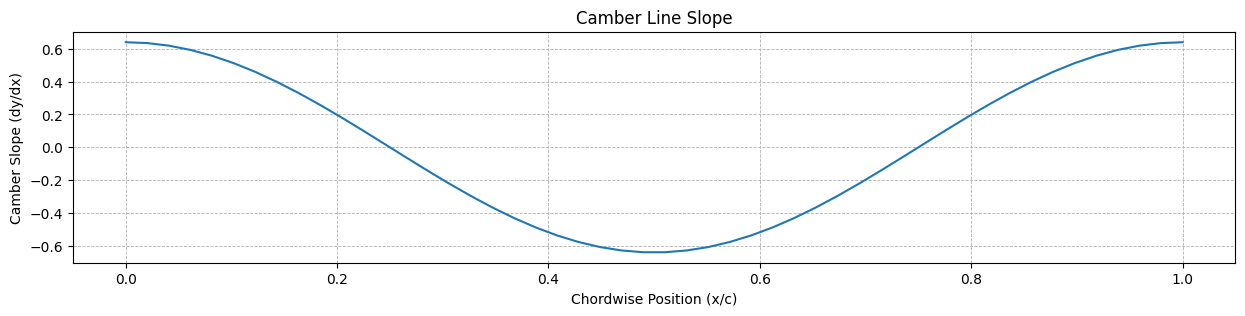

In [5]:


def camber_line(x, y):
    """
    Plots the camber line of an airfoil.

    Parameters:
    - x: Chordwise positions (array)
    - y: Camber values (array)
    """
    plt.figure(figsize=(15, 3))
    plt.plot(x, y)
    plt.ylim((min(y) - 0.1, max(y) + 0.1))
    plt.xlabel("Chordwise Position (x/c)")
    plt.ylabel("Camber (y/c)")
    plt.title("Camber Line")


    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Chord line
    plt.axvline(0, color='gray', linestyle='--', linewidth=1)  # Leading edge
    plt.axvline(1, color='gray', linestyle='--', linewidth=1)  # Trailing edge

    plt.grid(True, linestyle="--", linewidth=0.6)
    plt.show()

################################################################################

def camber_slope(y, dx=dx):
    """
    Computes and plots the slope of the camber line.

    Parameters:
    - y: Camber values (array)
    - dx: Step size for gradient calculation (default = 0.02)
    """
    y_slope = np.gradient(y, dx)
    x = np.linspace(0, 1, len(y))

    plt.figure(figsize=(15, 3))
    plt.plot(x, y_slope)
    plt.xlabel("Chordwise Position (x/c)")
    plt.ylabel("Camber Slope (dy/dx)")
    plt.title("Camber Line Slope")
    plt.grid(True, linestyle="--", linewidth=0.6)
    plt.show()

################################################################################

def naca_camber_line(x, m, p, c=1):
    """
    Computes the camber line of a NACA 4-digit airfoil.

    Parameters:
    - x: Chordwise position (array)
    - m: Maximum camber
    - p: Position of maximum camber
    - c: Chord length (default = 1)

    Returns:
    - y_camber: Camber line y-coordinates
    """
    y_camber = np.where(
        x < p * c,
        (m / p**2) * (2 * p * (x / c) - (x / c)**2),
        (m / (1 - p)**2) * ((1 - 2 * p) + 2 * p * (x / c) - (x / c)**2)
    )
    return y_camber

################################################################################

def generate_camber_line(camber_func, x_range=(0, 1), num_points=n, **kwargs):
    """
    Generates the camber line for a given function.

    Parameters:
    - camber_func: Function defining the camber line y = f(x)
    - x_range: Tuple defining the range of x (default: (0,1))
    - num_points: Number of points for smooth plotting (default: 100)
    - kwargs: Additional parameters for specific camber functions
    (e.g., NACA airfoils)

    Returns:
    - x: x-coordinates of the camber line
    - y: y-coordinates of the camber line
    """
    x = np.linspace(x_range[0], x_range[1], num_points)

    if isinstance(camber_func, (int, str)):
        camber_func = str(camber_func)
        m = int(camber_func[0]) / 100
        p = int(camber_func[1]) / 10
        y = naca_camber_line(x, m, p)
    else:
        y = camber_func(x, **kwargs)

    return x, y

################################################################################


# Example Usage
# (1) Using a NACA 2412 airfoil camber line
x, y = generate_camber_line(7511)
camber_line(x, y)
camber_slope(y)

#-------------------------------------------------------------------------------

custom_camber = lambda x: 0.1 * np.sin(2 * np.pi * x)  # Sinusoidal camber # 0.1sin(2.pi.x)
x, y = generate_camber_line(custom_camber)
camber_line(x, y)
camber_slope(y)






#**COEFFICIENT OF LIFT AND MOMENT CALCULATION**

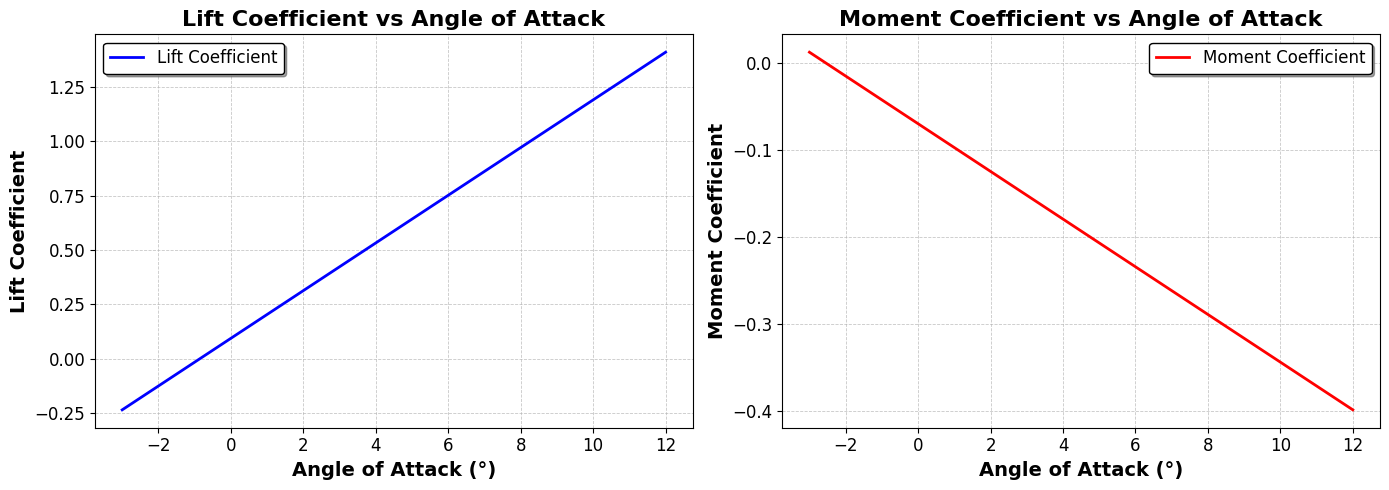

0.4289663427832961 3.0606060606060606


In [8]:
def plot_graphs_vs_alpha(alphas, y, label, color):
    '''
    Genrates a plot accoding to the coeffients given wrt to the AOA
      Parameters:
      - alphas: range of AOA values (array)
      - y: Ceffients wrt to those AOA (array)
      - label:name of the coeffients (string)
      - color: color of the plot (string)

    '''
    plt.plot(alphas, y, label=label, color=color, linewidth=2, markersize=6, markerfacecolor='white', markeredgewidth=2)

    plt.xlabel("Angle of Attack (°)", fontsize=14, fontweight='bold')
    plt.ylabel(label, fontsize=14, fontweight='bold')
    plt.title(f"{label} vs Angle of Attack", fontsize=16, fontweight='bold')

    plt.legend(fontsize=12, loc="best", frameon=True, fancybox=True, shadow=True, edgecolor='black')
    plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

################################################################################

def compute_airfoil_coefficients(alpha, naca):
    """
    Computes the lift coefficient (Cl) and moment coefficient (Cm)
    for a cambered airfoil based on thin airfoil theory.

    Parameters:
    - alpha: Angle of attack in degrees (single value or array)
    - naca: String containing the NACA 4-digit airfoil code

    Returns:
    - alpha: Angle of attack values (degrees)
    - Cl: Lift coefficient
    - Cm: Moment coefficient about quarter chord
    - slope: Camber slope distribution
    - sum2: Integral of camber slope
    - theta: Theta values for integration
    """
    if isinstance (naca , str) != True:
      naca = str(naca)
    M, P = int(naca[0]) + 1e-8, int(naca[1]) + 1e-8
    M /= 100
    P /= 10


    theta = np.linspace(0, np.pi, 10001)
    d = 0.5 * (1 - np.cos(theta))


    slope = np.zeros_like(theta)
    mask1, mask2 = d <= P, d > P
    slope[mask1] = ((2 * M) / (P ** 2)) * (P - d[mask1]) * 0.5 * np.sin(theta[mask1])
    slope[mask2] = ((2 * M) / ((1 - P) ** 2)) * (P - d[mask2]) * 0.5 * np.sin(theta[mask2])


    sum1 = np.trapz(slope * np.cos(theta), theta)
    sum2 = np.trapz(slope, theta)
    sum3 = np.trapz(slope * np.cos(2 * theta), theta)


    alpha_rad = np.radians(alpha)
    Cl = 2 * np.pi * alpha_rad + sum1 - (2 * sum2)
    Cm = -0.25 * (Cl + 2 * (sum1 - sum3))

    return alpha, Cl, Cm, slope, sum2, theta
################################################################################

#example use
alpha_values = np.linspace(-3, 12, 100)
Cl_values, Cm_values = [], []
aoa_values = []
naca = 7511
for alpha in alpha_values:
  aoa, Cl, Cm, _, _, _ = compute_airfoil_coefficients(alpha, naca)
  aoa_values.append(aoa)
  Cl_values.append(Cl)

  Cm_values.append(Cm)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plot_graphs_vs_alpha(aoa_values,Cl_values,'Lift Coefficient','blue')
plt.subplot(1, 2, 2)
plot_graphs_vs_alpha(aoa_values,Cm_values,'Moment Coefficient','red')
plt.tight_layout()



plt.show()
print(Cl_values[40],aoa_values[40])

################################################################################



# **FINDING CIRCULATION**

Enter the angle of attack (in degrees): 3
Enter the NACA airfoil number: 7511
Enter the freestream velocity: 20


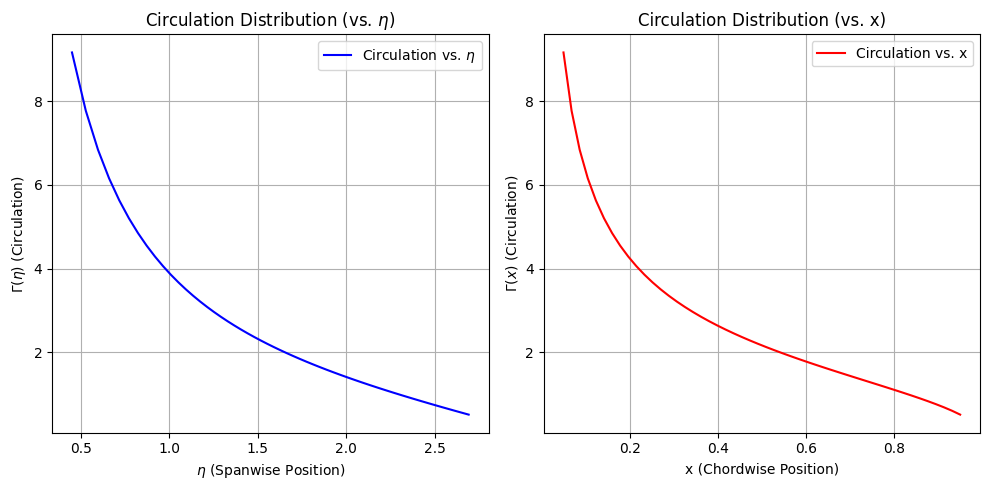

In [9]:
def compute_circulation(alpha, naca, u_free):
    '''
    Computes the circulation distribution along the spanwise and chordwise positions of an airfoil.

    Parameters:
    - alpha (float): Angle of attack in degrees.
    - naca (str): NACA 4-digit airfoil designation.
    - u_free (float): Freestream velocity.

    Returns:
    - eta (numpy array): Spanwise position values derived from cos^-1(1-2x).
    - zeta (numpy array): Chordwise position values avoiding division by zero.
    - circulation_theta (list): Circulation distribution along eta.
    '''
    alphas, Cl, Cm, slope, sum2, theta = compute_airfoil_coefficients(alpha, naca)

    zeta = np.linspace(0.05, 0.95, 50)  # Values taken to avoid division by zero
    eta = np.arccos(1 - (2 * zeta))

    circulation_theta = []
    for f in range(len(eta)):
        sumz = 0
        for p in range(1, 50):
            suma = np.sum(((2 / np.pi) * (slope * np.cos(p * theta) * (np.pi / 10001))) * np.sin(eta[f]))
            sumz += suma

        circulation = (2 * u_free) * ((((alpha * np.pi) / 180) - (1 / np.pi) * sum2) * ((1 + np.cos(eta[f])) / np.sin(eta[f])) + sumz)
        circulation_theta.append(circulation)

    return eta, zeta, circulation_theta

################################################################################

def plot_circulation(eta, zeta, circulation_theta):
    '''
    Plots the circulation distribution along spanwise and chordwise positions.

    Parameters:
    - eta (numpy array): Spanwise position values.
    - zeta (numpy array): Chordwise position values.
    - circulation_theta (list): Circulation distribution along eta.
    '''
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(eta, circulation_theta, label='Circulation vs. $\eta$', color='b')
    plt.xlabel(r'$\eta$ (Spanwise Position)')
    plt.ylabel(r'$\Gamma(\eta)$ (Circulation)')
    plt.title('Circulation Distribution (vs. $\eta$)')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(zeta, circulation_theta, label='Circulation vs. x', color='r')
    plt.xlabel('x (Chordwise Position)')
    plt.ylabel(r'$\Gamma(x)$ (Circulation)')
    plt.title('Circulation Distribution (vs. x)')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

#################################################################################################
# Example usage
alpha = float(input("Enter the angle of attack (in degrees): "))
naca = str(input("Enter the NACA airfoil number: "))
u_free = float(input("Enter the freestream velocity: "))

eta, x, circulation_theta = compute_circulation(alpha, naca, u_free)
plot_circulation(eta, x, circulation_theta)


23.457402630473734
Total Circulation (from velocity field): 4.2584
Bound Circulation (from distribution sum): 4.2598


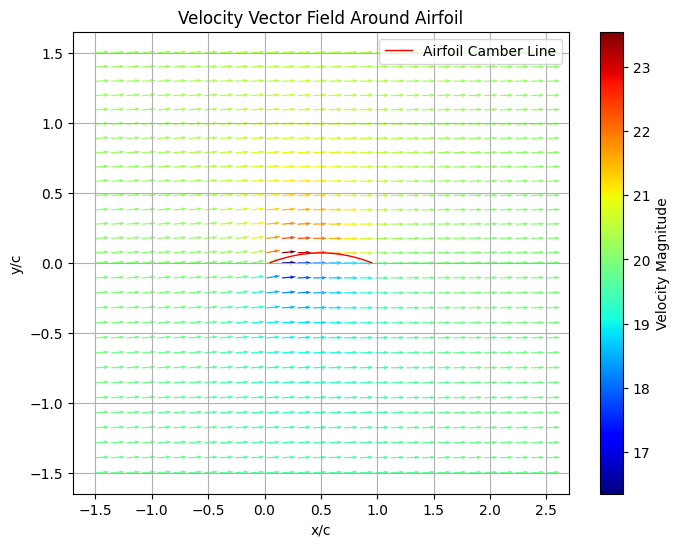

In [22]:


def distance(x1, y1, x2, y2):
    """
    Computes the Euclidean distance between two points (x1, y1) and (x2, y2).
    """
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

#-------------------------------------------------------------------------------

def slope_theta(x1, y1, x2, y2):
    """
    Computes the angle (theta) of the line connecting two points (x1, y1) and (x2, y2).
    """
    return np.arctan2((y2 - y1), (x2 - x1))

#-------------------------------------------------------------------------------

def compute_circulation_using_distribution(circulation_theta):
    """
    Computes the total bound circulation by summing up the circulation values along the airfoil.
    """
    total_circulation = np.sum(circulation_theta)
    return total_circulation * np.pi / 100

#-------------------------------------------------------------------------------

def circulation_using_line_integral(X, Y, Vx, Vy):
    """
    Computes the circulation using Stokes' theorem by integrating the vorticity over a given region.

    Parameters:
    - X, Y: Meshgrid of coordinates in the velocity field.
    - Vx, Vy: Velocity components along x and y directions.

    Returns:
    - total_circulation: Circulation computed using the line integral method.
    """
    dx = np.mean(np.diff(X, axis=1))
    dy = np.mean(np.diff(Y, axis=0))
    dA = dx * dy
    dVy_dx = np.gradient(Vy, axis=1) / dx  # ∂Vy/∂x
    dVx_dy = np.gradient(Vx, axis=0) / dy  # ∂Vx/∂y

    vorticity = -dVy_dx + dVx_dy  # Compute vorticity field

    total_circulation = np.sum(vorticity * dA)  # Integrate vorticity over area

    return total_circulation

################################################################################

def compute_velocity_field(alpha, ufree, circulation_theta, camber_y):
    """
    Computes and visualizes the velocity field around an airfoil.

    Parameters:
    - alpha: Angle of attack in degrees.
    - ufree: Freestream velocity.
    - circulation_theta: Circulation distribution along the airfoil.
    - camber_y: Camber line of the airfoil.

    The function calculates the induced velocity field using the Biot-Savart law
    and visualizes the velocity vectors around the airfoil.
    """
    zeta = np.linspace(0.05, 0.95, 50)  # Control points along the chord are not taken till end to avoid division by 0
    alpha_rad = np.radians(alpha)
    x_range = np.linspace(-1.5, 2.5, 30)
    y_range = np.concatenate([
        np.linspace(-1.5, min(camber_y) - 0.0015, 15),
        np.linspace(max(camber_y) + 0.0015, 1.5, 15)
    ])  # Y-coordinates for velocity field except the y along the camberline as the sreamlines don't pass thorough the airfoil
    X, Y = np.meshgrid(x_range, y_range)
    U_total = np.zeros_like(X, dtype=float)
    V_total = np.zeros_like(Y, dtype=float)

    for i in range(len(zeta)):
        for j in range(X.shape[0]):
            for k in range(X.shape[1]):
                x1, y1 = X[j, k], Y[j, k]
                if circulation_theta[i] != 0:
                    r = distance(x1, y1, zeta[i], camber_y[i])
                    theta_slope = slope_theta(zeta[i], camber_y[i], x1, y1)
                    if r > 1e-6:  # Avoid singularities
                        induced_velocity = circulation_theta[i] / (2 * np.pi * r)
                        U_total[j, k] += induced_velocity * np.sin(theta_slope) * np.pi / 100
                        V_total[j, k] -= induced_velocity * np.cos(theta_slope) * np.pi / 100

    U_total += ufree * np.cos(alpha_rad)
    V_total += ufree * np.sin(alpha_rad)
    print(max(U_total[15]))
    # Compute circulation values using different methods
    dist_circ = compute_circulation_using_distribution(circulation_theta)
    line_circ = circulation_using_line_integral(X, Y, U_total, V_total)

    print(f"Total Circulation (from velocity field): {line_circ:.4f}")
    print(f"Bound Circulation (from distribution sum): {dist_circ:.4f}")

    # Compute velocity magnitude for visualization
    magnitude = np.sqrt(U_total**2 + V_total**2)

    # Plot velocity vector field
    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, U_total / magnitude, V_total / magnitude, magnitude, scale=35, cmap="jet")
    plt.colorbar(label="Velocity Magnitude")
    plt.plot(zeta, camber_y, 'r-', linewidth=1, label="Airfoil Camber Line")
    plt.title("Velocity Vector Field Around Airfoil")
    plt.xlabel("x/c")
    plt.ylabel("y/c")
    plt.grid()
    plt.legend()
    plt.show()
################################################################################################
# Example usage
alpha = 3
ufree = 20
x, camber_y = generate_camber_line('7511')  # Modify for different airfoils
# theta = np.linspace(0, np.pi, len(zeta))  # Angular positions along the chord

# Compute circulation distribution along the airfoil
circulation_theta = compute_circulation(alpha, '7511', ufree)

# Compute and visualize the velocity field
compute_velocity_field(alpha=alpha, ufree=ufree, circulation_theta=circulation_theta[-1], camber_y=camber_y)



## closeup vector field

using_line_integral: 2.8796
using_distrbution: 2.9077


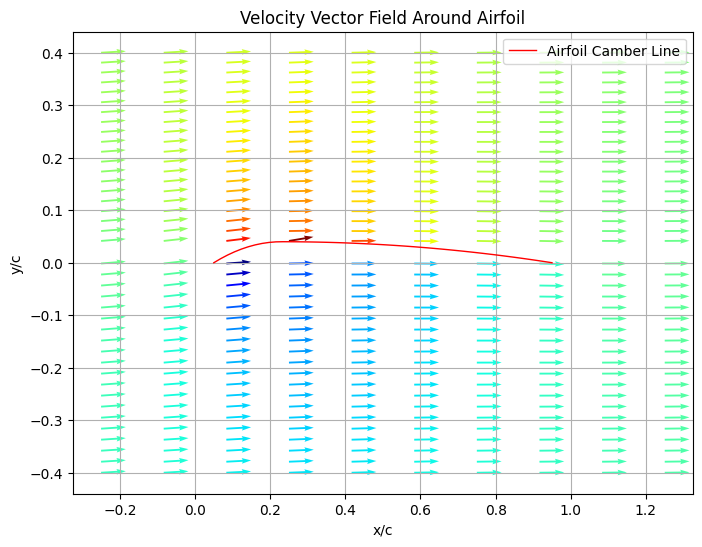

In [18]:
# closeup vector feild
def compute_velocity_field_close(alpha, ufree, circulation_theta, camber_y):
    zeta = np.linspace(0.05, 0.95, 50)  # Control points along the chord
    alpha_rad = np.radians(alpha)
    x_range = np.linspace(-0.25,1.25, 10)
    y_range = np.concatenate([np.linspace(-0.4, min(camber_y)-0.0015, 20), np.linspace(max(camber_y)+0.0015, 0.4, 20)])
    X, Y = np.meshgrid(x_range, y_range)


    U_total = np.zeros_like(X, ufree * np.cos(alpha_rad))
    V_total = np.zeros_like(Y, ufree * np.sin(alpha_rad))

    for i in range(len(zeta)):
      for j in range(X.shape[0]):
          for k in range(X.shape[1]):
              x1, y1 = X[j, k], Y[j, k]
              if circulation_theta[i] != 0:
                  r = distance(x1, y1, zeta[i], camber_y[i])
                  theta_slope = slope_theta(zeta[i], camber_y[i], x1, y1)

                  if r > 1e-6:
                      induced_velocity = circulation_theta[i] / (2 * np.pi * r)
                      U_total[j, k] += induced_velocity * np.sin(theta_slope)*np.pi/100
                      V_total[j, k] -= induced_velocity * np.cos(theta_slope)*np.pi/100


    U_total = ufree * np.cos(alpha_rad) + U_total
    V_total = ufree * np.sin(alpha_rad) + V_total
    dist_circ = compute_circulation_using_distribution(circulation_theta)
    line_cir = circulation_using_line_integral(X, Y, U_total, V_total)
    print(f"using_line_integral: {line_cir:.4f}")
    print(f"using_distrbution: {dist_circ:.4f}")
    magnitude = np.sqrt(U_total**2 + V_total**2)
    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, U_total/magnitude, V_total/magnitude, magnitude,scale=25, cmap="jet")
    plt.plot(zeta, camber_y, 'r-', linewidth=1, label="Airfoil Camber Line")
    plt.title("Velocity Vector Field Around Airfoil")
    plt.xlabel("x/c")
    plt.ylabel("y/c")
    plt.grid()
    plt.legend()
    plt.show()

# Example usage
alpha = 2 # Angle of attack in degrees
ufree = 20  # Freestream velocity

x, camber_y = generate_camber_line('4212')  # Modify for cambered airfoil
# theta = np.linspace(0, np.pi, len(zeta))  # Angular positions along chord
circulation_theta = compute_circulation(alpha, '4212', ufree)  # Example circulation values
# circulation_theta[-1]
compute_velocity_field_close(alpha, ufree, circulation_theta[-1], camber_y)

In [ ]:
def main():
  choice = int(input("Enter 1 for NACA 2412 airfoil or 2 for custom camber line: "))

  if choice == 1:
      naca = str(input("Enter the NACA airfoil number (e.g., '2412'): "))
      x, y = generate_camber_line(naca)
  elif choice == 2:
      coeffs = list(map(float, input("Enter the coefficients of the polynomial separated by space: ").split()))
      poly = np.poly1d(coeffs)  # Create polynomial function
      x = np.linspace(0, 1, 100)  # Generate x values
      y = poly(x)  # Compute camber line using polynomial

  camber_line(x, y)
  camber_slope(y)
  alpha_min, alpha_max = map(float, input("Enter range of angle of attack (degrees) (first min then max): ").split())
  alpha_values = np.linspace(alpha_min, alpha_max, 100)
  Cl_values, Cm_values = [], []
  aoa_values = []
  for alpha in alpha_values:
    aoa, Cl, Cm, _, _, _ = compute_airfoil_coefficients(alpha, naca)
    aoa_values.append(aoa)
    Cl_values.append(Cl)
    Cm_values.append(Cm)
  plt.figure(figsize=(14, 5))
  plt.subplot(1, 2, 1)
  plot_graphs_vs_alpha(aoa_values,Cl_values,'Lift Coefficient','blue')
  plt.subplot(1, 2, 2)
  plot_graphs_vs_alpha(aoa_values,Cm_values,'Moment Coefficient','red')
  plt.tight_layout()
  plt.show()
  ufree = float(input("Enter freestream velocity: "))
  alpha = float(input("Enter the angle of attack (in degrees): "))
  eta, x, circulation_theta = compute_circulation(alpha, naca, u_free)
  plot_circulation(eta, x, circulation_theta)
  # Compute circulation distribution along the airfoil
  circulation_theta = compute_circulation(alpha, '4212', ufree)

  # Compute and visualize the velocity field
  compute_velocity_field(alpha=alpha, ufree=ufree, circulation_theta=circulation_theta[-1], camber_y=camber_y)
  compute_velocity_field_close(alpha, ufree, circulation_theta[-1], camber_y)
    # # Generate camber line and slope
    # zeta = np.linspace(0, 1, num_points)
    # camber_y = np.array([float(input(f"Enter camber line value at zeta={z:.2f}: ")) for z in zeta])
    # circulation_theta = np.array([float(input(f"Enter circulation value at zeta={z:.2f}: ")) for z in zeta])

    # # Compute Lift & Moment Coefficients
    # alpha_values = np.linspace(-3, 12, 100)
    # Cl_values, Cm_values = [], []
    # aoa_values = []
    # for alpha in alpha_values:
    #     aoa, Cl, Cm, _, _, _ = compute_airfoil_coefficients(alpha, naca)
    #     aoa_values.append(aoa)
    #     Cl_values.append(Cl)
    #     Cm_values.append(Cm)

    # # Plot Lift and Moment Coefficients
    # plt.figure(figsize=(14, 5))
    # plt.subplot(1, 2, 1)
    # plot_graphs_vs_alpha(aoa_values, Cl_values, 'Lift Coefficient', 'blue')
    # plt.subplot(1, 2, 2)
    # plot_graphs_vs_alpha(aoa_values, Cm_values, 'Moment Coefficient', 'red')
    # plt.tight_layout()
    # plt.show()

    # # Compute Circulation
    # eta, zeta, circulation_theta = compute_circulation(alpha, naca, ufree)
    # plot_circulation(eta, zeta, circulation_theta)

    # # Compute and visualize velocity field
    # compute_velocity_field(alpha, ufree, circulation_theta, zeta, camber_y)

if __name__ == "__main__":
    main()
